In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df_heart=pd.read_csv("https://raw.githubusercontent.com/gagan3012/Bio-Conscious-Data-Challenge/master/data/heart-rate-data.csv")
df_heart.head()

,point_value,point_timestamp,timezone_offset
0,98,2017-05-16 22:16:00,-700
1,104,2017-05-16 22:17:00,-700
2,110,2017-05-16 22:18:00,-700
3,112,2017-05-16 22:19:00,-700
4,97,2017-05-16 22:20:00,-700


In [4]:
df_activity=pd.read_csv("https://raw.githubusercontent.com/gagan3012/Bio-Conscious-Data-Challenge/master/data/distance-activity-data.csv")
df_activity.head()

,point_value(kilometers),point_timestamp,timezone_offset,device
0,0.03607,2017-05-15 15:52:44,-700,iPhone
1,0.30443,2017-05-15 15:59:36,-700,iPhone
2,0.31764,2017-05-15 16:09:35,-700,iPhone
3,0.16387,2017-05-15 16:16:43,-700,iPhone
4,0.01675,2017-05-15 16:27:07,-700,iPhone


In [5]:
df_glucose=pd.read_csv("https://raw.githubusercontent.com/gagan3012/Bio-Conscious-Data-Challenge/master/data/blood-glucose-data.csv")
df_glucose.head()

,point_value(mg/dL),point_timestamp,timezone_offset
0,142,2017-05-15 07:51:22,-700
1,140,2017-05-15 07:56:23,-700
2,138,2017-05-15 08:01:22,-700
3,136,2017-05-15 08:06:22,-700
4,130,2017-05-15 08:11:23,-700


In [6]:
df_heart.shape

(69851, 3)

In [7]:
df_glucose.shape

(14702, 3)

In [8]:
df_activity.shape

(84920, 4)

In [9]:
df_heart.corr()

,point_value,timezone_offset
point_value,1.0,NaN
timezone_offset,NaN,NaN


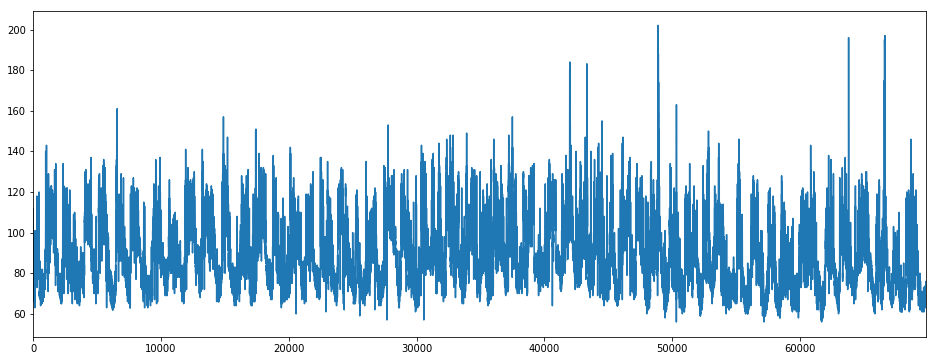

In [10]:
df_heart['point_value'].plot(figsize=(16,6))

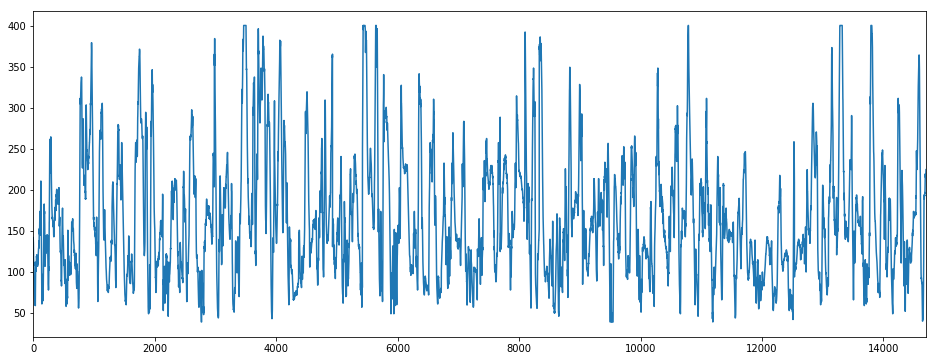

In [11]:
df_glucose['point_value(mg/dL)'].plot(figsize=(16,6))

In [12]:
df_glucose['Output'] = df_glucose['point_value(mg/dL)'].apply(lambda x: 'diabetes' if x > 125 else 'prediabetes' if x > 99 and x <= 125 else 'normal' if x > 70 else 'diabetes')

In [13]:
df_glucose['Output'] = df_glucose['Output'].replace(['normal','prediabetes', 'diabetes'],[0,1,2])

In [14]:
df_glucose.head()

,point_value(mg/dL),point_timestamp,timezone_offset,Output
0,142,2017-05-15 07:51:22,-700,2
1,140,2017-05-15 07:56:23,-700,2
2,138,2017-05-15 08:01:22,-700,2
3,136,2017-05-15 08:06:22,-700,2
4,130,2017-05-15 08:11:23,-700,2


In [15]:
df_glucose = df_glucose.set_index('point_timestamp')

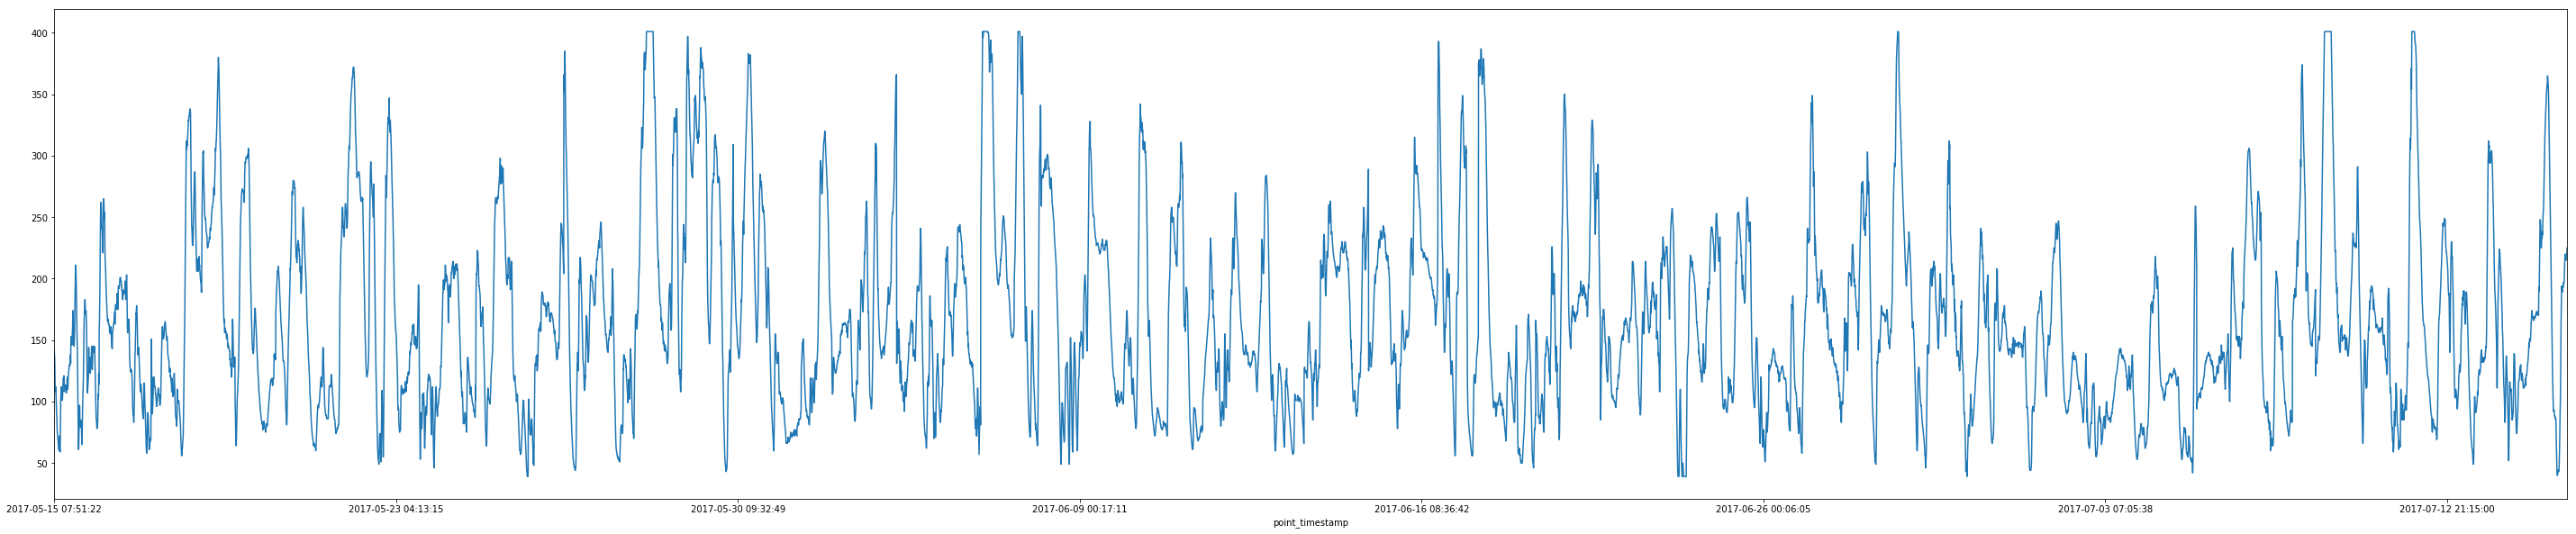

In [16]:
df_glucose['point_value(mg/dL)'].plot(figsize=(50,10))

In [17]:
df_glucose.drop(['timezone_offset'],axis=1,inplace=True)

In [18]:
df_glucose.head()

,point_value(mg/dL),Output
point_timestamp,,
2017-05-15 07:51:22,142,2
2017-05-15 07:56:23,140,2
2017-05-15 08:01:22,138,2
2017-05-15 08:06:22,136,2
2017-05-15 08:11:23,130,2


In [19]:
df_heart['Output'] = df_heart['point_value'].apply(lambda x: 'Normal' if x < 100 and x >= 60 else 'High' if x > 100 and x <= 125 else 'Low' if x < 60 else 'Too Low')

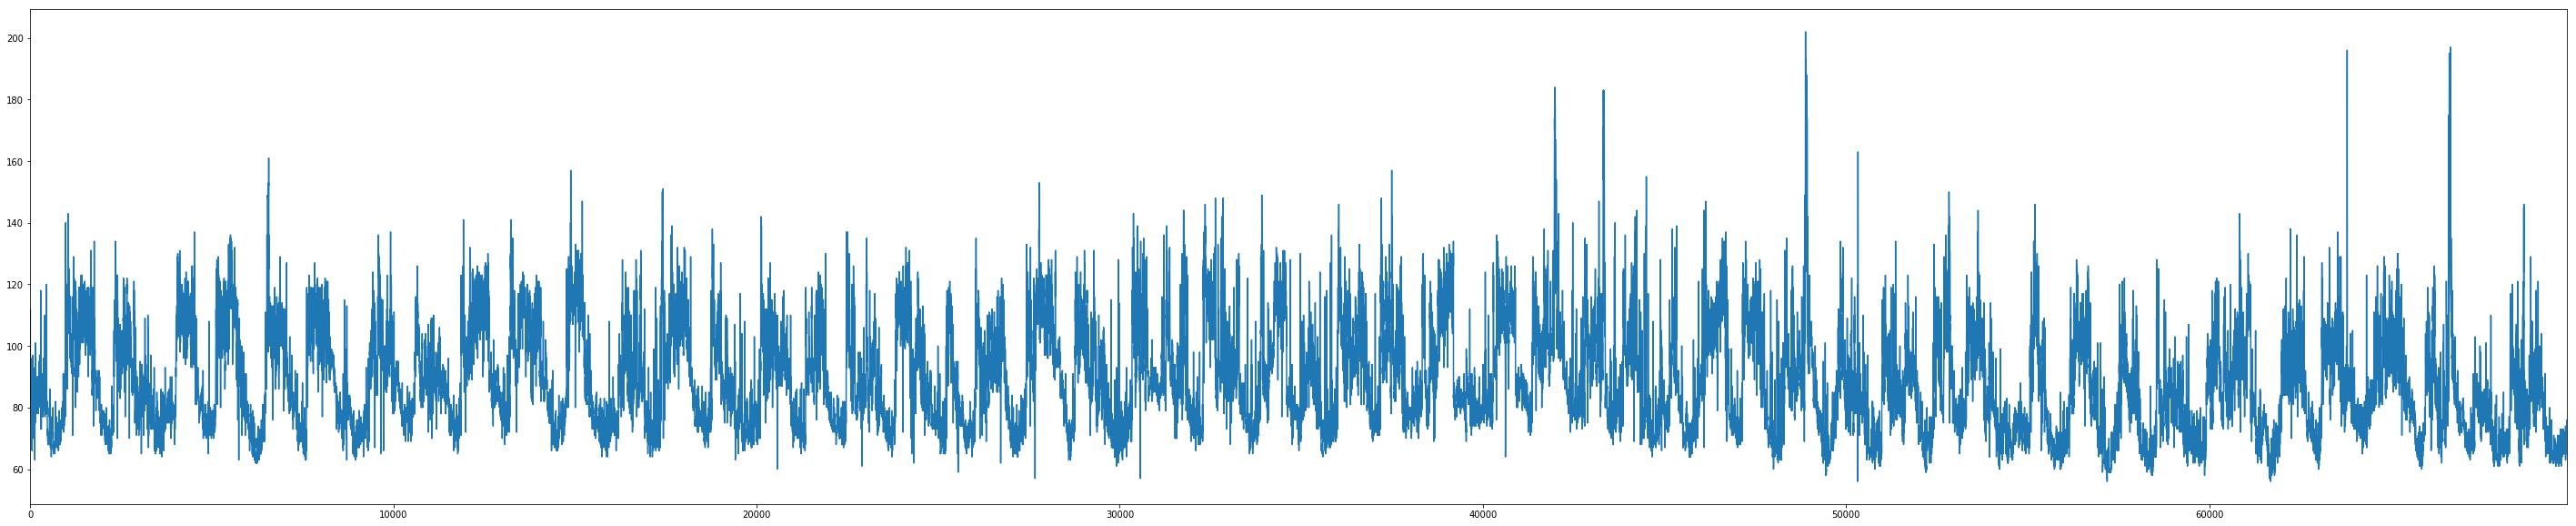

In [20]:
df_heart['point_value'].plot(figsize=(50,10))

In [21]:
df_heart['Output'].value_counts()

Normal     52139
High       15507
Too Low     2088
Low          117
Name: Output, dtype: int64

In [22]:
df_activity = df_activity.set_index('point_timestamp')

In [23]:
df_activity.drop(['timezone_offset'],axis=1,inplace=True)

In [24]:
df_activity.head()

,point_value(kilometers),device
point_timestamp,,
2017-05-15 15:52:44,0.03607,iPhone
2017-05-15 15:59:36,0.30443,iPhone
2017-05-15 16:09:35,0.31764,iPhone
2017-05-15 16:16:43,0.16387,iPhone
2017-05-15 16:27:07,0.01675,iPhone


In [25]:
df_activity['device'].value_counts()

FitbitWatch    82872
iPhone          2048
Name: device, dtype: int64

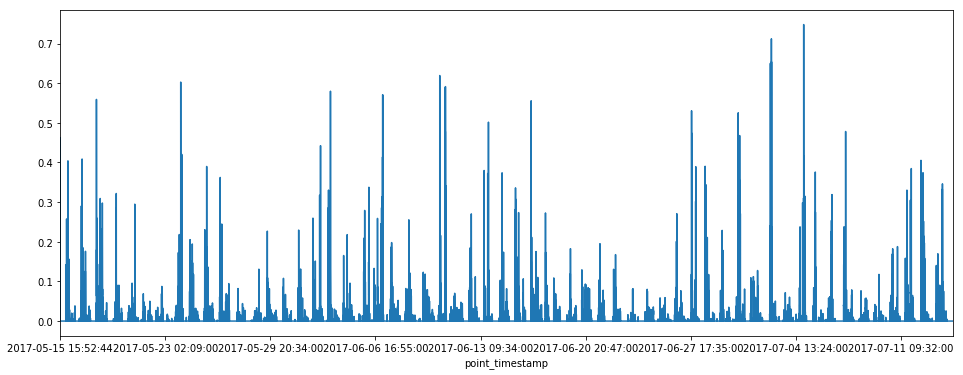

In [26]:
df_activity['point_value(kilometers)'].plot(figsize=(16,6))